In [1]:
library(ggplot2)

file1 <- "InputData/NCHSData04.csv"
df <- read.csv(file1, sep = ",")
df$Week <- formatC(df$Week, width = 2, flag="0")
df<-df[df$Year>2012, ]

df$yw <- paste(df$Year, df$Week)

df <-as.data.frame(apply(df,2,function(x)gsub('\\s+', '',x)))                     
colnames(df)[3] <- "Percent"
colnames(df)[4] <- "Baseline"
rownames(df) <- df$yw
                         
df$Percent <- as.numeric(as.character(df$Percent))
df$Baseline <- as.numeric(as.character(df$Baseline))
df$Threshold <- as.numeric(as.character(df$Threshold))
df$yw <- as.numeric(as.character(df$yw))
# remove rows which range (201301-201339)
for( week in 201301:201339) {
    drop<- as.character(as.numeric(week))
    df<- df[!rownames(df) %in%drop, ]
}

new_df <- df[, c("yw","Week","Percent", "Baseline","Threshold" )]

pdf 
  2

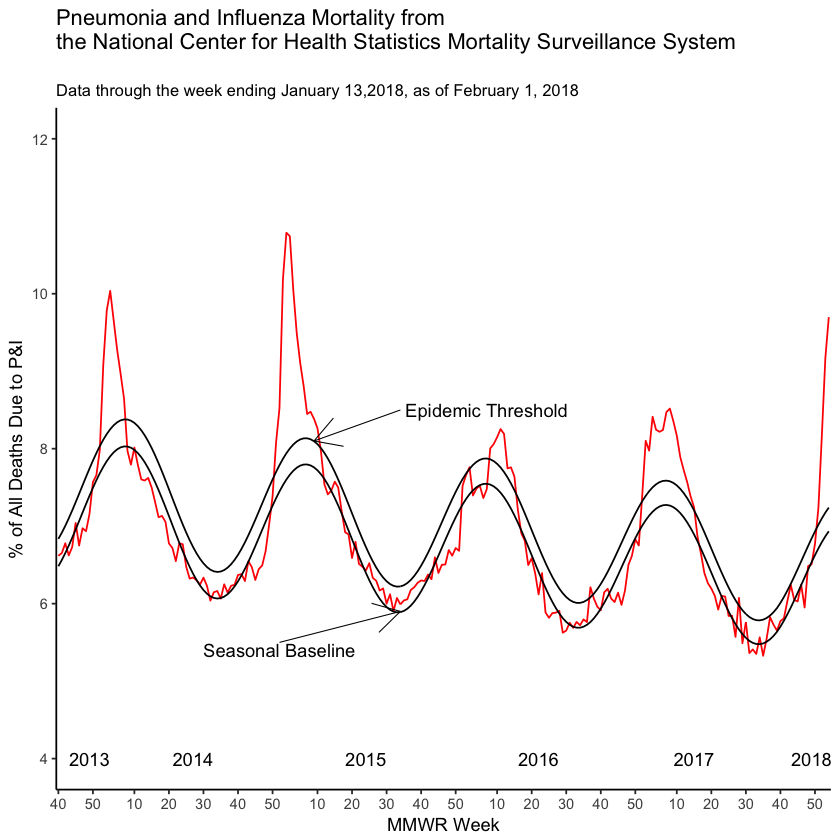

In [3]:
breakPoint <- c("201340", "201350", "201410","201420", "201430", "201440", "201450", 
           "201510","201520", "201530", "201540", "201550", 
          "201610","201620", "201630", "201640", "201650",
          "201710","201720", "201730", "201740", "201750")

label <- c("40", "50", "10","20", "30", "40", "50", 
           "10","20", "30", "40", "50", 
          "10","20", "30", "40", "50",
          "10","20", "30", "40", "50")

d1 <- data.frame(x1 =75, x2 = 100, y1 = 8.1, y2 = 8.5)
d2 <- data.frame(xe =100, xs = 65, ye = 5.9, ys = 5.5)

breakPoint <- as.numeric(as.character(breakPoint))
p <- ggplot(new_df, aes(x = factor(yw))) + 
    geom_line(aes(y= Percent, group = 1, colour = "Percent of Deaths Due to Pneumonia and Influenza")) +
    geom_line(aes(y=Threshold, group = 1, colour = "Threshold")) +
    geom_line(aes(y=Baseline, group = 1, colour = "Baseline"))

p <- p + scale_colour_manual(values=c("black","red","black")) + geom_density(adjust = 1/50) + ylim(4,12)
p <- p + ylab("% of All Deaths Due to P&I" ) + xlab("MMWR Week")

p <- p + scale_x_discrete(breaks=breakPoint,labels=label)
p <- p + theme(axis.text.x = element_text(angle = 45)) + theme_classic() + theme(legend.position = "none")

p <- p + geom_segment(data=d1, mapping=aes(x=x2, y=y2, xend=x1, yend=y1), arrow=arrow(), size=0.3, color="black") +
    geom_segment(data=d2, mapping=aes(x=xs, y=ys, xend=xe, yend=ye), arrow=arrow(), size=0.3, color="black")


p <- p + annotate("text", label = c("2013", "2014", "2015", "2016", "2017", "2018"), 
                  x = c(10,40,90,140,185,219), y = 4, color = "black") + 
        annotate("text", x=125, y=8.5, label="Epidemic Threshold",color="black") +
        annotate("text", x=65, y=5.4, label="Seasonal Baseline",color="black")
p <- p + labs(title = "Pneumonia and Influenza Mortality from\nthe National Center for Health Statistics Mortality Surveillance System\n", 
              subtitle = "Data through the week ending January 13,2018, as of February 1, 2018")


p 
png(filename="part2_outputGraphs/pic4_Mortality.png")
plot(p)
dev.off()
